<a href="https://colab.research.google.com/github/weberton/machine-learning-module2/blob/main/KNN_gafanhoto_esperanca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

dados = pd.read_excel('gaf_esp.xlsx')

dados.head()

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
0,Gafanhoto,0.50,7.0
1,Gafanhoto,0.50,6.0
2,Gafanhoto,0.60,5.5
3,Gafanhoto,0.65,4.5
4,Gafanhoto,0.54,3.2


In [2]:
dados.describe()

,Comprimento do Abdômen,Comprimento das Antenas
count,100.000000,100.000000
mean,4.936200,5.382400
std,3.343806,2.296001
min,0.500000,0.890000
25%,1.692500,3.775000
50%,4.500000,5.500000
75%,8.200000,7.000000
max,10.000000,9.700000


In [4]:
coluna_renomeadas = {
    'Espécie': 'especie',
    'Comprimento do Abdômen': 'comprimento_abdomen',
    'Comprimento das Antenas': 'comprimento_antenas'
}

dados = dados.rename(columns=coluna_renomeadas)
dados.head()

,especie,comprimento_abdomen,comprimento_antenas
0,Gafanhoto,0.50,7.0
1,Gafanhoto,0.50,6.0
2,Gafanhoto,0.60,5.5
3,Gafanhoto,0.65,4.5
4,Gafanhoto,0.54,3.2


In [10]:
dados.groupby('especie').describe()

comprimento_abdomen                                              \
                        count    mean       std  min    25%    50%    75%   
especie                                                                     
Esperança                50.0  8.1206  1.129729  5.4  7.225  8.200  9.000   
Gafanhoto                50.0  1.7518  0.786941  0.5  1.200  1.685  2.415   

                comprimento_antenas                                            \
            max               count    mean       std   min    25%   50%  75%   
especie                                                                         
Esperança  10.0                50.0  7.2156  1.334945  4.50  6.205  7.00  8.2   
Gafanhoto   3.6                50.0  3.5492  1.417861  0.89  2.550  3.77  4.3   

                
           max  
especie         
Esperança  9.7  
Gafanhoto  7.0

In [7]:
dados.shape

(100, 3)

<Axes: xlabel='comprimento_abdomen', ylabel='comprimento_antenas'>

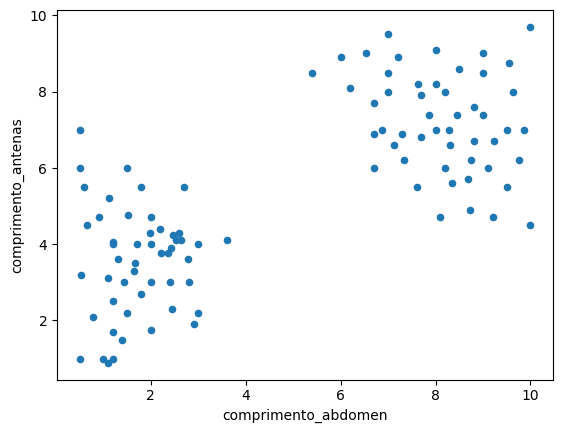

In [11]:
dados.plot.scatter(x='comprimento_abdomen', y='comprimento_antenas')

In [17]:
from sklearn.model_selection import train_test_split

x = dados[['comprimento_abdomen', 'comprimento_antenas']]
y = dados['especie']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=42)

In [19]:
list(y_train).count('Gafanhoto')

40

In [20]:
list(y_train).count('Esperança')

40

In [21]:
len(x_train)

80

In [22]:
len(x_test)

20

In [23]:
from sklearn.neighbors import KNeighborsClassifier

modelo_classificador = KNeighborsClassifier(n_neighbors=3)

modelo_classificador.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
#Fazendo um teste com valóres aleatórios
modelo_classificador.predict([[8,6]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Esperança'], dtype=object)

In [26]:
from sklearn.metrics import accuracy_score

y_predito = modelo_classificador.predict(x_test)

accuracy_score(y_true = y_test, y_pred = y_predito)

1.0

In [28]:
acuracia = accuracy_score(y_test, y_predito)
acuracia

1.0